# Analogous SPIA Results

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathway_forte.constants import *
from pathway_forte.pathway_enrichment.functional_class import *

In [2]:
def checker(pathways):
    kegg_manager = KeggManager()
    reactome_manager = ReactomeManager()
    wp_manager = WikipathwaysManager()
    
    for pathway in pathways:
        
        kegg_pathway = kegg_manager.get_pathway_by_id(pathway)
        
        if kegg_pathway:
            continue
        
        reactome_pathway = reactome_manager.get_pathway_by_id(pathway)
        
        if reactome_pathway:
            continue
            
        reactome_pathway = wp_manager.get_pathway_by_id(pathway)
        
        if reactome_pathway:
            continue
            
        ValueError(f"Pathway {pathway} not found")
    

def get_spia_results(dataset):
    """Get SPIA results for KEGG, Reactome and WikiPathways for a dataset from CSV file."""
    SPIA = os.path.join(DATA, 'results', 'spia')

    kegg_reactome_df = pd.read_csv(
        os.path.join(SPIA, f'{dataset}_kegg_reactome_spia.csv'), sep=','
    )
    reactome_wikipathways_df = pd.read_csv(
        os.path.join(SPIA, f'{dataset}_reactome_wikipathways_spia.csv'), sep=','
    )
    kegg_wikipathways_df = pd.read_csv(
        os.path.join(SPIA, f'{dataset}_kegg_wikipathways_spia.csv'), sep=','
    )
    
    # Filter pathways with a given q value
    q_value = 0.05
    column = 'pGFWER'
    kegg_reactome_df = kegg_reactome_df.query(f'{column} <= {q_value}')
    reactome_wikipathways_df = reactome_wikipathways_df.query(f'{column} <= {q_value}')
    kegg_wikipathways_df = kegg_wikipathways_df.query(f'{column} <= {q_value}')
        
    # Convert the list to dataframe to run the pathwayforte generic function
    return (
        pd.DataFrame(list(kegg_reactome_df["ID"].tolist()), columns=["pathway_id"]), 
        pd.DataFrame(list(reactome_wikipathways_df["ID"].tolist()), columns=["pathway_id"]), 
        pd.DataFrame(list(kegg_wikipathways_df["ID"].tolist()), columns=["pathway_id"]), 
    )

In [3]:
brca_1, brca_2, brca_3 = get_spia_results('brca')
kirc_1, kirc_2, kirc_3 = get_spia_results('kirc')
lihc_1, lihc_2, lihc_3 = get_spia_results('lihc')
prad_1, prad_2, prad_3 = get_spia_results('prad')

In [4]:
brca_actual_dict, brca_expected_dict = get_analogs_comparison_numbers(brca_1, brca_2, brca_3)
kirc_actual_dict, kirc_expected_dict = get_analogs_comparison_numbers(kirc_1, kirc_2, kirc_3)
lihc_actual_dict, lihc_expected_dict = get_analogs_comparison_numbers(lihc_1, lihc_2, lihc_3)
prad_actual_dict, prad_expected_dict = get_analogs_comparison_numbers(prad_1, prad_2, prad_3)

Plot how many pairwise pathways with mappings exist versus how many are expected

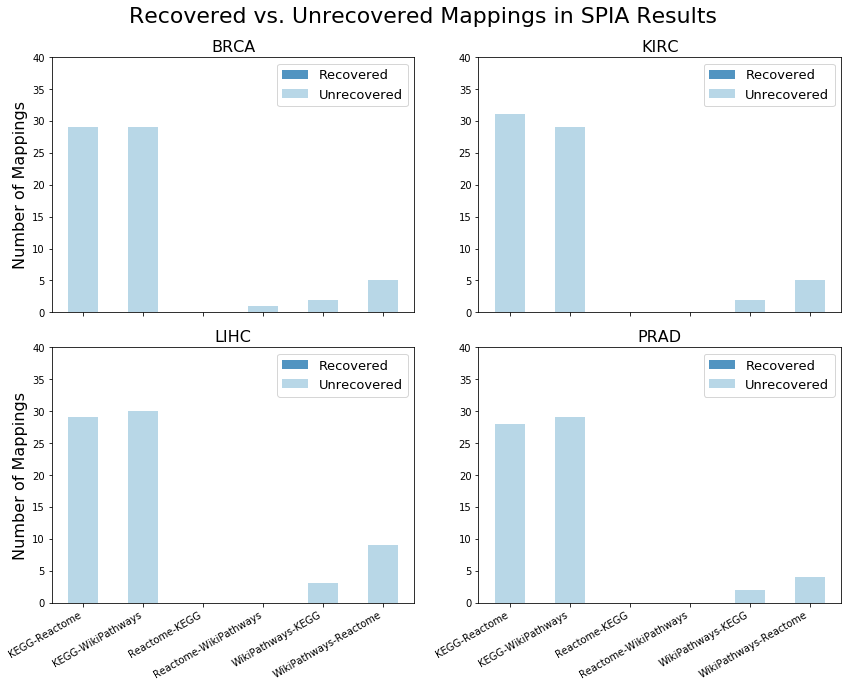

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Recovered vs. Unrecovered Mappings in SPIA Results', fontsize=22)

N = 6
index = np.arange(N)
bar_width = 0.5
opacity = 0.8

pairings = (
    'KEGG-Reactome', 
    'KEGG-WikiPathways', 
    'Reactome-KEGG', 
    'Reactome-WikiPathways',
    'WikiPathways-KEGG', 
    'WikiPathways-Reactome',
)
label_font = {'size': 16}

plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict.values())
expected_vals = list(brca_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('BRCA', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=1)


plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict.values())
expected_vals = list(kirc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict.values())
expected_vals = list(lihc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('LIHC', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,40)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict.values())
expected_vals = list(prad_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('PRAD', fontsize=16)
plt.ylim(0,40)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings_spia.png',dpi=250)
plt.show()